# Task 1: Prediction using Supervised ML

__Predict the percentage of marks of an student based on the number of study hours.__

__In this task we take a data of the students marks percentage w.r.t their studying hours and use Regression Algorithms to Predict the marks percentage w.r.t their studying hours.__ 

### Author: SACHIN YADAV

In [5]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 7)
import warnings
warnings.filterwarnings('ignore')



In [6]:
data = pd.read_excel('C:/Users/admin/Documents/GRIP Internship/Task 1 (study hour)/Student study hours.xlsx',
                     index_col='ID')
data.shape

(25, 2)

In [7]:
data.head(6)

,Hours,Scores
ID,,
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


In [8]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 600.0 bytes


Visualize the data and try to predict the relation between independent and dependent variables of our dataset.

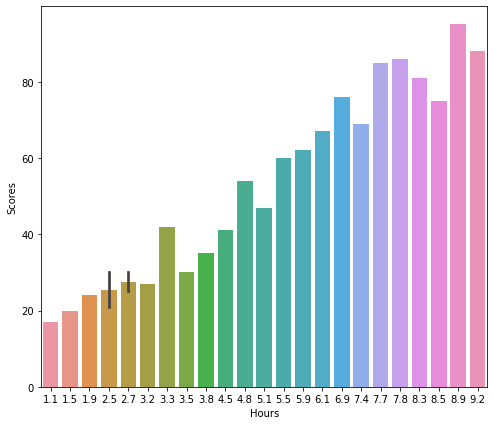

In [10]:
sns.barplot(data['Hours'], data['Scores'])

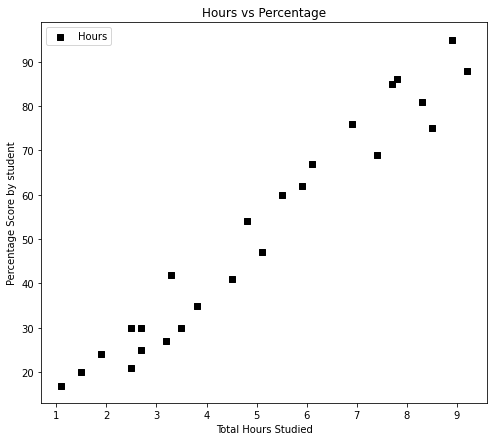

In [11]:
# Plotting the distribution of scores
plt.scatter(data.Hours, data.Scores, label='Hours', color='k', marker='s')  
plt.title('Hours vs Percentage')  
plt.xlabel('Total Hours Studied')  
plt.ylabel('Percentage Score by student')  
plt.legend()
plt.show()

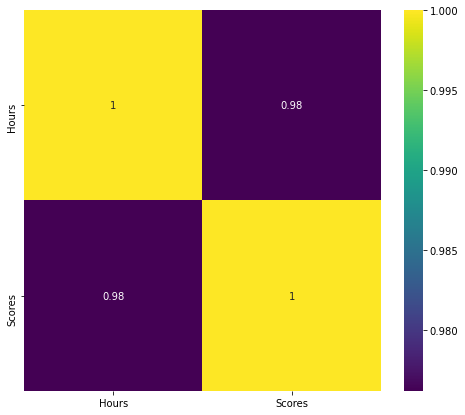

In [12]:
sns.heatmap(data.corr(), annot=True, cmap='viridis')  

__So, our independent feature is highly correaled to with dependent feature.__

## Preparing the data

In [73]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) # 70% data for the training


In [75]:
print(X_train.shape)
print(X_test.shape)
type(y_test)

(17, 1)
(8, 1)


numpy.ndarray

In [45]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()

# X_train = pd.DataFrame(ss.fit_transform(X_train))

# X_test = pd.DataFrame(ss.fit_transform(X_test))

We can apply StandardScalar method. But this will decrease our accuracy in LinearRegression model.

# Build a model

## Apply Linear Regression 

In [86]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

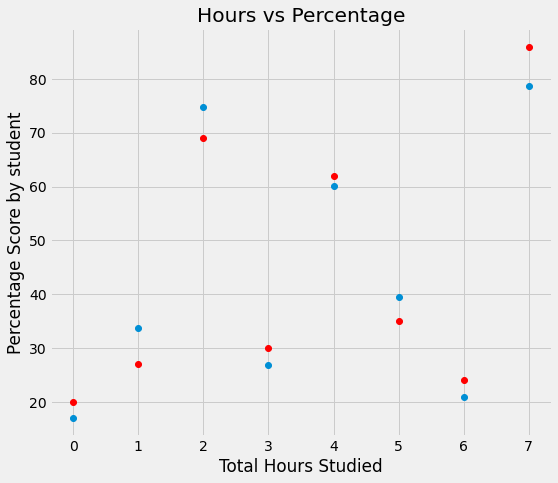

In [87]:
y_pred = lr.predict(X_test)
plt.plot(y_test,'ro')
plt.plot(y_pred,'o')
plt.title('Hours vs Percentage')  
plt.xlabel('Total Hours Studied')  
plt.ylabel('Percentage Score by student')
plt.show()

## Evaluate the Score

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

evs = explained_variance_score(y_test,y_pred)

r2 = r2_score(y_test, y_pred)

print('for {} model scores are: \n R2 Score:{} \n Mean Absolute Error:{} \n  Mean squared error:{} \n Explainedvariance score: {}'
      . format('Linear Regression', r2, mae, mse, evs))

for Linear Regression model scores are: 
 R2 Score:0.9568211104435257 
 Mean Absolute Error:4.4197278080276545 
  Mean squared error:22.96509721270044 
 Explainedvariance score: 0.9568649952899161


In [89]:
train_score= lr.score(X_train, y_train)

test_score = lr.score(X_test, y_test)


print('Train Score:' ,train_score)
# regression coefficients 
print('Coefficients: ',lr.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {} '.format(test_score)) 
  

Train Score: 0.9484997422695115
Coefficients:  [9.78856669]
Variance score: 0.9568211104435257 


It's is not a case of overfitting. Because both test and train score is quite well.

We can apply HyperParameter tunning to improve our accuracy.

## Plot the bestfit line on graph

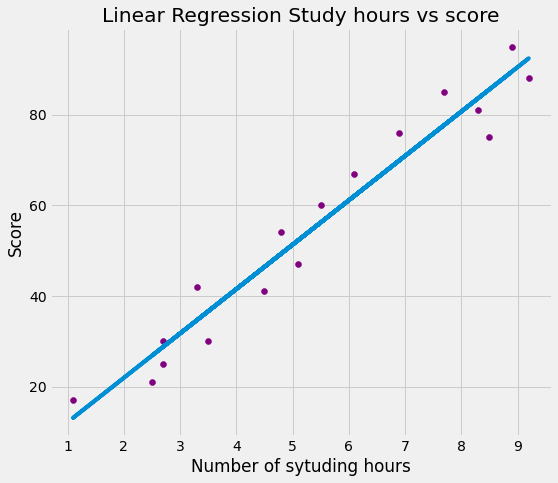

In [90]:
# Plot a graph for training dataset
plt.scatter(X_train, y_train, color='purple')
plt.plot(X_train, lr.predict(X_train))
plt.title('Linear Regression Study hours vs score')
plt.xlabel('Number of sytuding hours')
plt.ylabel('Score')
plt.show()

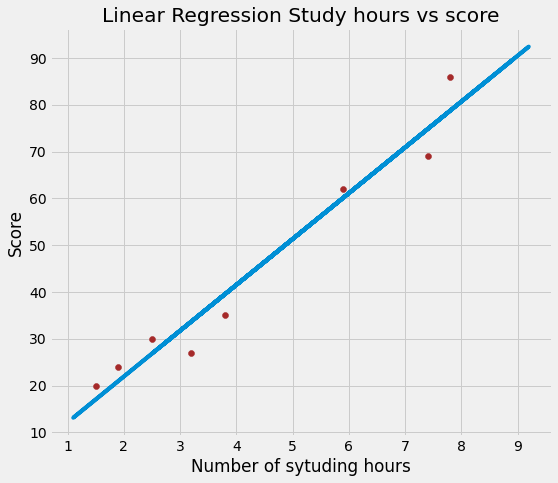

In [91]:
# Plot a graph for testing data
plt.scatter(X_test, y_test, color ='brown')
plt.plot(X_train, lr.predict(X_train))
plt.title('Linear Regression Study hours vs score')
plt.xlabel('Number of sytuding hours')
plt.ylabel('Score')
plt.show()

## Plot for Residual Error 

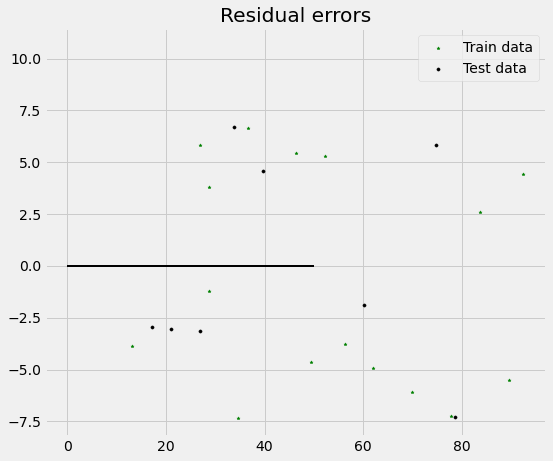

In [92]:

## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, 
            marker='*', color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, 
            color = "black", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 

## Check the accuracy for other Regression Algorithms.

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
svr = SVR()

model = [rf,dt,svr]


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [94]:
def built_model(models):
    
    for reg in models:
        reg.fit(X_train,y_train)
        y_pred= reg.predict(X_test)
        
        # Find the score for our model        
        r2 = r2_score(y_test,y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        evs = explained_variance_score(y_test,y_pred)
        print('=============================================')
        print('for {} model scores are: \n R2 Score:{} \n Mean Absolute Error:{} \n  Mean squared error:{} \n Explainedvariance score: {}'. format(reg, r2, mae, mse, evs))
    

In [95]:
built_model(model)

for RandomForestRegressor() model scores are: 
 R2 Score:0.9229874480579466 
 Mean Absolute Error:4.607708333333333 
  Mean squared error:40.95984774305554 
 Explainedvariance score: 0.9284558973203939
for DecisionTreeRegressor() model scores are: 
 R2 Score:0.8516995211375187 
 Mean Absolute Error:7.125 
  Mean squared error:78.875 
 Explainedvariance score: 0.8583095860630453
for SVR() model scores are: 
 R2 Score:0.1584029684975602 
 Mean Absolute Error:19.239848494365738 
  Mean squared error:447.61127117674295 
 Explainedvariance score: 0.3572732535360177


__So, Linear Regression gives best performance on our data.__

## Make Prediction Using Linear Regression 

We trained our model , It's time to make some predictions

In [97]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [84]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636
